Firstly I'm importing the required libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Then I'm going to read the csv file and store it in a dataframe called 'df'.

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df

country        date                  sector      value   timestamp
0          Brazil  01/01/2019                   Power   0.096799  1546300800
1           China  01/01/2019                   Power  14.816100  1546300800
2       EU27 & UK  01/01/2019                   Power   1.886490  1546300800
3          France  01/01/2019                   Power   0.051217  1546300800
4         Germany  01/01/2019                   Power   0.315002  1546300800
...           ...         ...                     ...        ...         ...
135403     Russia  31/05/2023  International Aviation   0.016524  1685491200
135404      Spain  31/05/2023  International Aviation   0.068408  1685491200
135405         UK  31/05/2023  International Aviation   0.103774  1685491200
135406         US  31/05/2023  International Aviation   0.200409  1685491200
135407      WORLD  31/05/2023  International Aviation   1.558450  1685491200

[135408 rows x 5 columns]

In [ ]:
df.shape

(135408, 5)

Finding the shape of the dataset

In [ ]:
df.head()

country        date sector      value   timestamp
0     Brazil  01/01/2019  Power   0.096799  1546300800
1      China  01/01/2019  Power  14.816100  1546300800
2  EU27 & UK  01/01/2019  Power   1.886490  1546300800
3     France  01/01/2019  Power   0.051217  1546300800
4    Germany  01/01/2019  Power   0.315002  1546300800

Here i'm calling the first five rows of the dataset

In [ ]:
df.tail()

country        date                  sector     value   timestamp
135403  Russia  31/05/2023  International Aviation  0.016524  1685491200
135404   Spain  31/05/2023  International Aviation  0.068408  1685491200
135405      UK  31/05/2023  International Aviation  0.103774  1685491200
135406      US  31/05/2023  International Aviation  0.200409  1685491200
135407   WORLD  31/05/2023  International Aviation  1.558450  1685491200

Here i'm printing the last five rows of the dataset

In [ ]:
df[df.duplicated(keep="first")]

Empty DataFrame
Columns: [country, date, sector, value, timestamp]
Index: []

Here I have tried to identify the duplicate values present in the dataset.But there are no duplicate values as the output is showing only the column names.

In [ ]:
df.describe()

value     timestamp
count  135408.000000  1.354080e+05
mean        2.359439  1.615896e+09
std         5.908582  4.020589e+07
min         0.000078  1.546301e+09
25%         0.078661  1.581098e+09
50%         0.314597  1.615896e+09
75%         1.636632  1.650694e+09
max        46.263500  1.685491e+09

Using describe() function i'm trying to describe the columns value and timestamp by finding the minimum, maximum,mean and other values from them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


Through info() function we can know the type of data stored in each column.

In [ ]:
df.isnull().sum()

country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64

Using isnull() function we can identify the null values present in the dataset.In the given dataset there are no null values as the out is showing '0' value at each column.

In [ ]:
df.isnull().any()

country      False
date         False
sector       False
value        False
timestamp    False
dtype: bool

In [ ]:
df.columns

Index(['country', 'date', 'sector', 'value', 'timestamp'], dtype='object')

Using this df.column we can know the columns that are present in the dataset.It gives all column names under a single list.

In [ ]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df['Year'] = df['date'].dt.year

In [ ]:
df["date"].min(),df["date"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2023-05-31 00:00:00'))

Here I have identified the minimum and maximum(start and end dates) dates which are present in the dataset.

In [ ]:
df.country.unique()

array(['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
       'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'UK', 'US', 'WORLD'],
      dtype=object)

Using unique() function we can get the unique values that are present in the columns.

In [ ]:
df.sector.unique()

array(['Power', 'Industry', 'Ground Transport', 'Residential',
       'Domestic Aviation', 'International Aviation'], dtype=object)

Below is the bar graph which represents the data of co2 emissions done by each country.

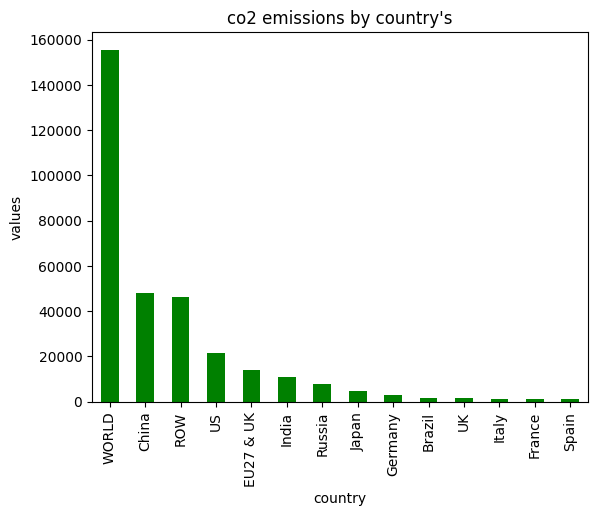

In [ ]:
total_co2_emissions_country = df.groupby("country")["value"].sum().sort_values(ascending=False)
total_co2_emissions_country.plot(kind = 'bar',color = 'g')
plt.title("co2 emissions by country's")
plt.xlabel("country")
plt.ylabel("values")
plt.show()

Below is the bar graph where it tells about the co2 emissions done by each sectors.

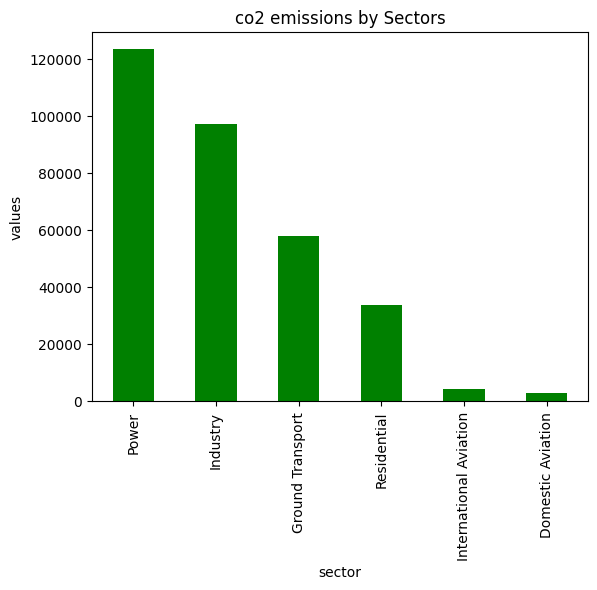

In [ ]:
total_co2_emissions_sector = df.groupby("sector")["value"].sum().sort_values(ascending=False)
total_co2_emissions_sector.plot(kind = 'bar',color = 'g')
plt.title("co2 emissions by Sectors")
plt.xlabel("sector")
plt.ylabel("values")
plt.show()

In [ ]:
df.columns

Index(['country', 'date', 'sector', 'value', 'timestamp', 'Year'], dtype='object')

**Sector Analysis:** Analyze trends and patterns in different sectors over time.

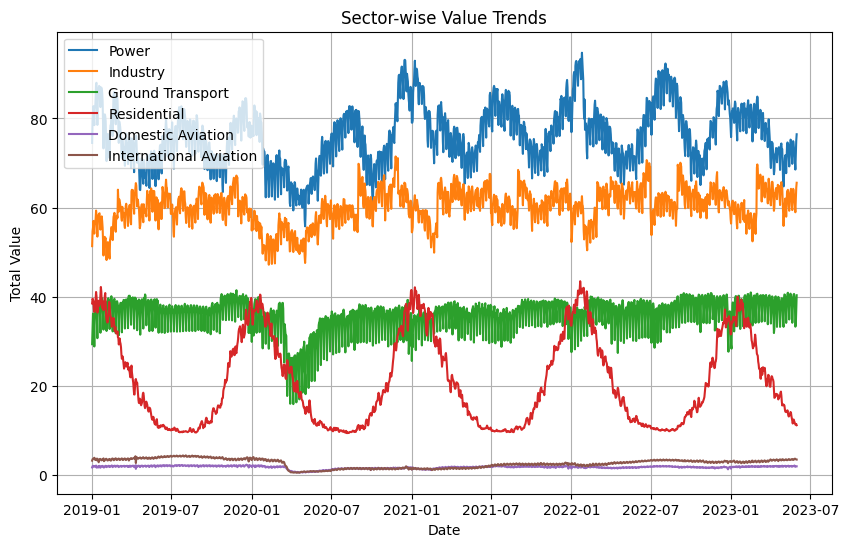

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
grouped_data = df.groupby(['date', 'sector']).agg({
    'value': 'sum'   # Replace with your relevant metrics
}).reset_index()
plt.figure(figsize=(10, 6))
sectors = df['sector'].unique()
for sector in sectors:
    sector_data = grouped_data[grouped_data['sector'] == sector]
    plt.plot(sector_data['date'], sector_data['value'], label=sector)
plt.xlabel('Date')
plt.ylabel('Total Value')  # Replace with your relevant metric label
plt.title('Sector-wise Value Trends')
plt.legend()
plt.grid()
plt.show()


The above poltting shows the analysis of sectors over time.

**Country Comparison:** Compare sector values across different countries.

<Figure size 1200x800 with 0 Axes>

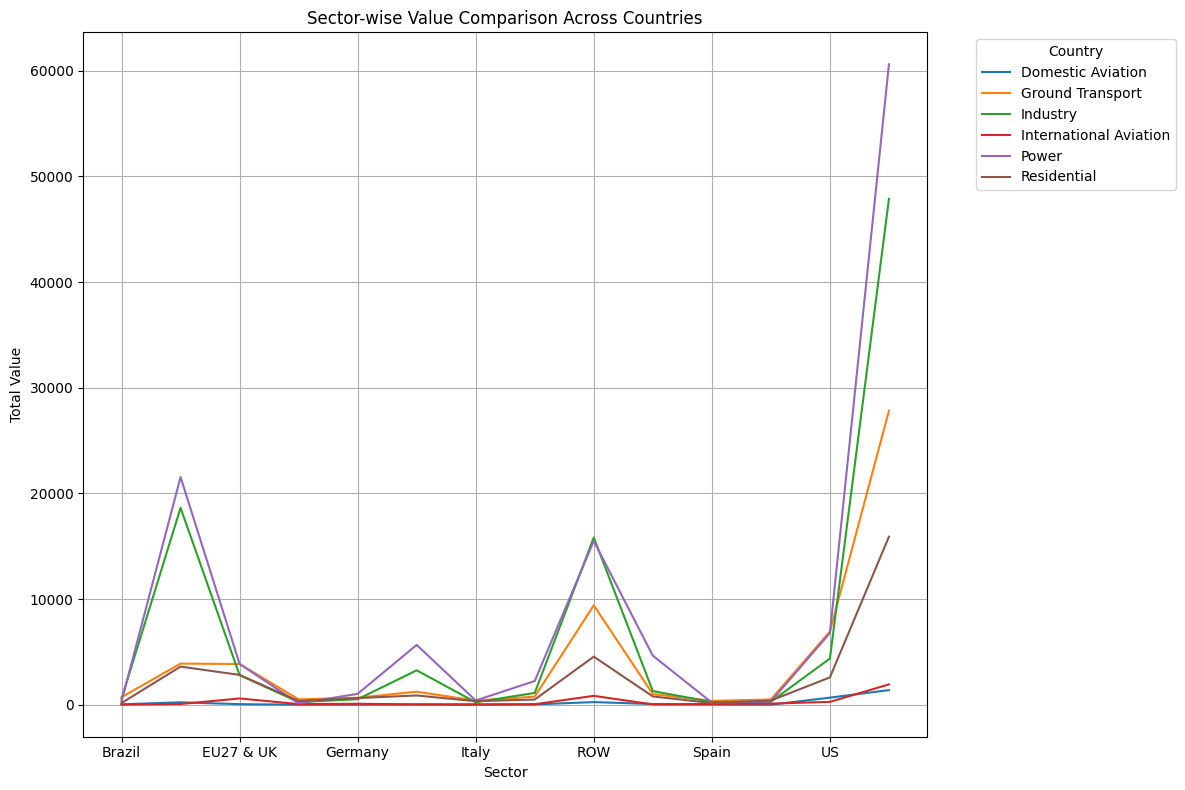

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
grouped_data = df.groupby(['country', 'sector']).agg({
    'value': 'sum'
}).reset_index()
pivot_data = grouped_data.pivot(index='sector', columns='country', values='value')
plt.figure(figsize=(12, 8))
pivot_data.T.plot(kind='line', figsize=(12, 8))
plt.xlabel('Sector')
plt.ylabel('Total Value')
plt.title('Sector-wise Value Comparison Across Countries')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


  From the code written we create a line plot where each line represents a different country's sector values over the chosen sectors. This visualization helps us to compare how the sector values change across countries and sectors.

**Time Series Analysis:** Perform time series analysis to identify trends and seasonality in sector values.

<ipython-input-83-e066f1e2fad6>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


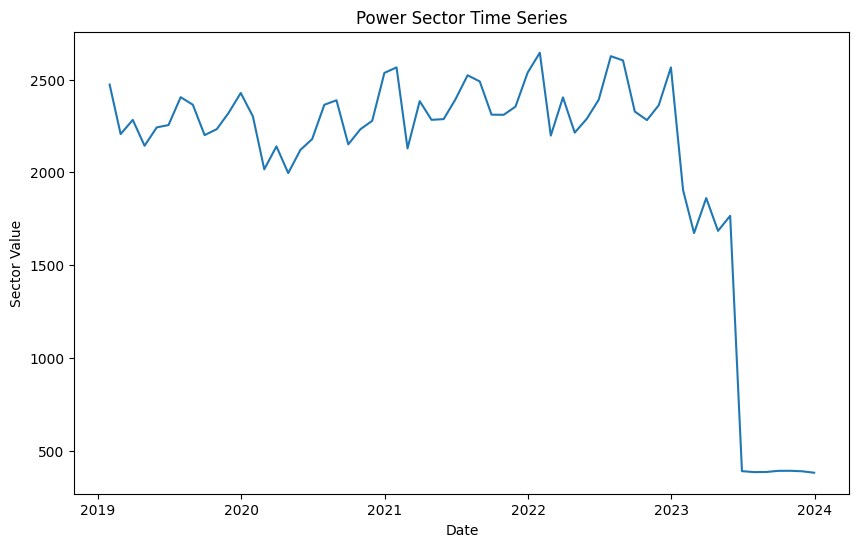

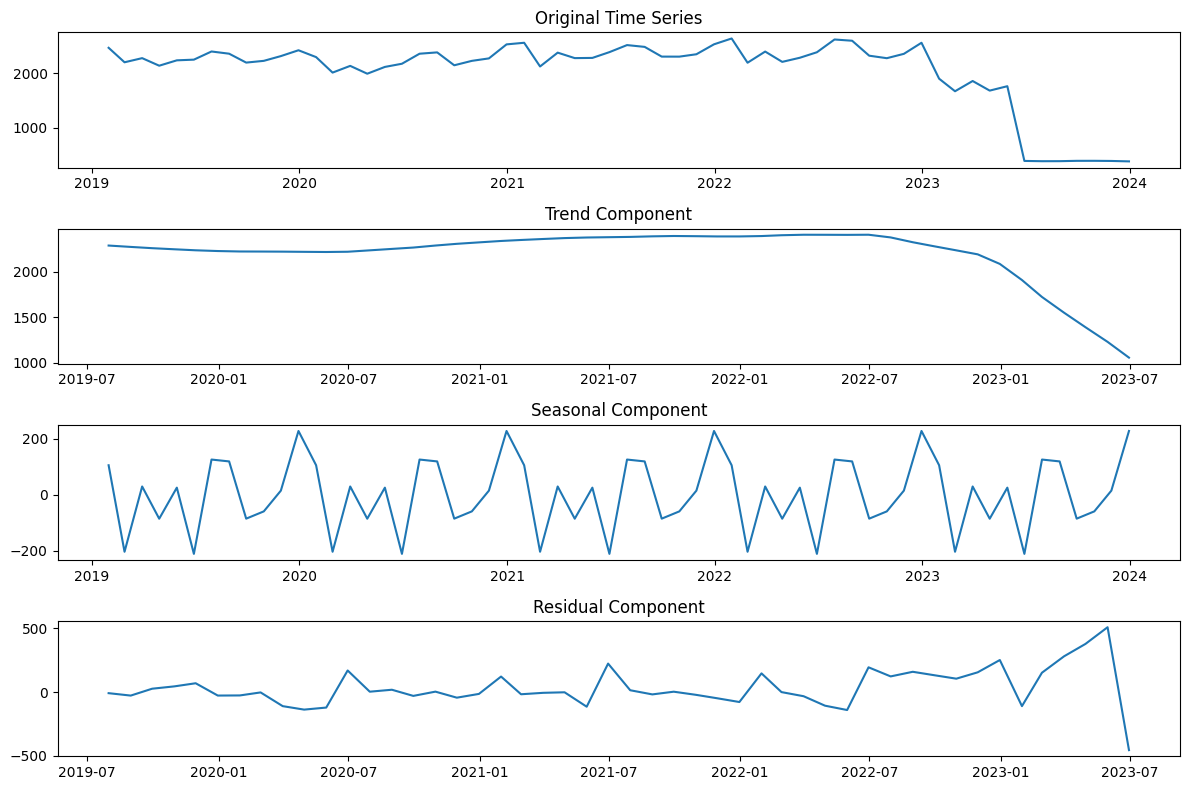

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Choose the sector for analysis
sector_to_analyze = 'Power'
sector_data = df[df['sector'] == sector_to_analyze]['value']

# Resample the data to a specific frequency (e.g., 'D' for daily, 'M' for monthly)
frequency = 'M'  # Adjust based on your data frequency
resampled_sector_data = sector_data.resample(frequency).sum()

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(resampled_sector_data)
plt.xlabel('Date')
plt.ylabel('Sector Value')
plt.title(f'{sector_to_analyze} Sector Time Series')
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(resampled_sector_data, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(resampled_sector_data)
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Residual Component')

plt.tight_layout()
plt.show()




Stationarity

<ipython-input-85-889e7185ca38>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


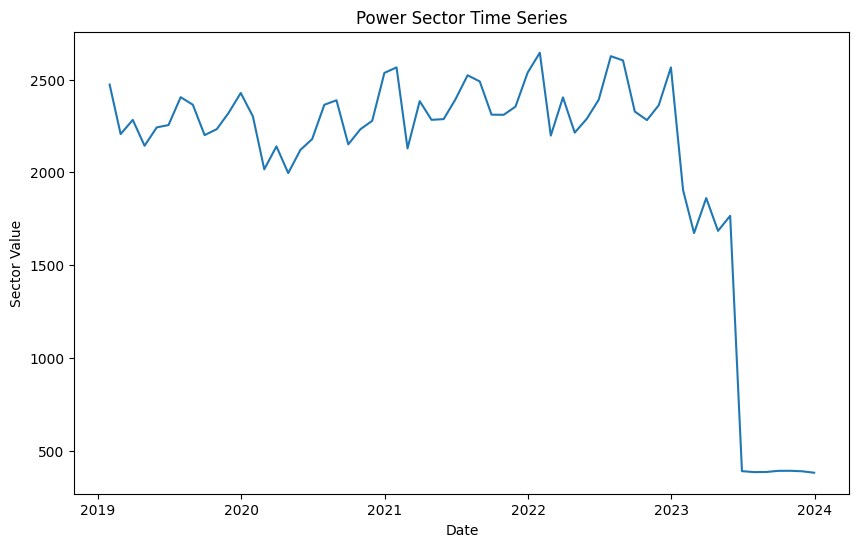

Power: Fail to reject the null hypothesis. The time series is non-stationary.


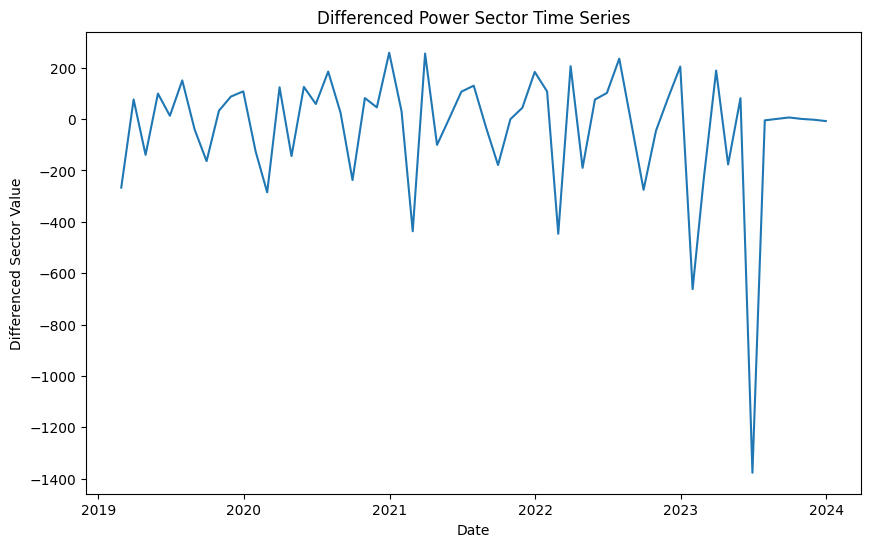

Power: Differenced series is stationary.


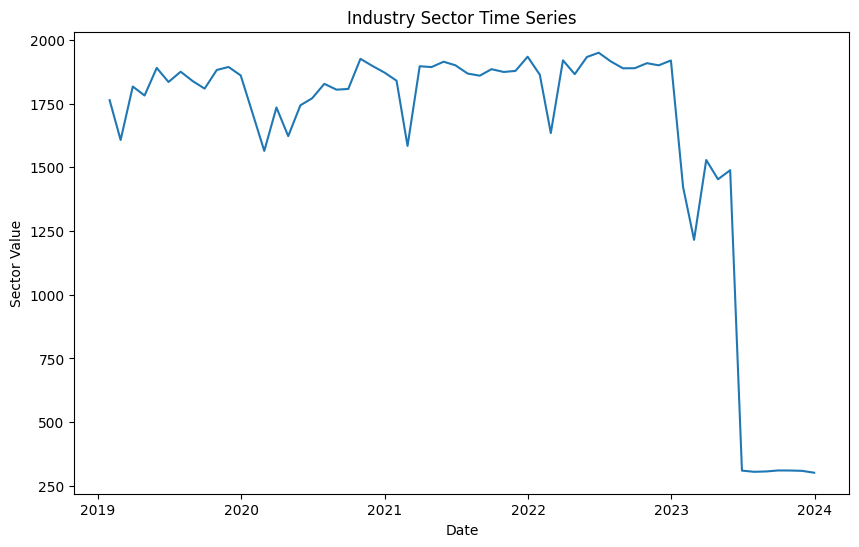

Industry: Fail to reject the null hypothesis. The time series is non-stationary.


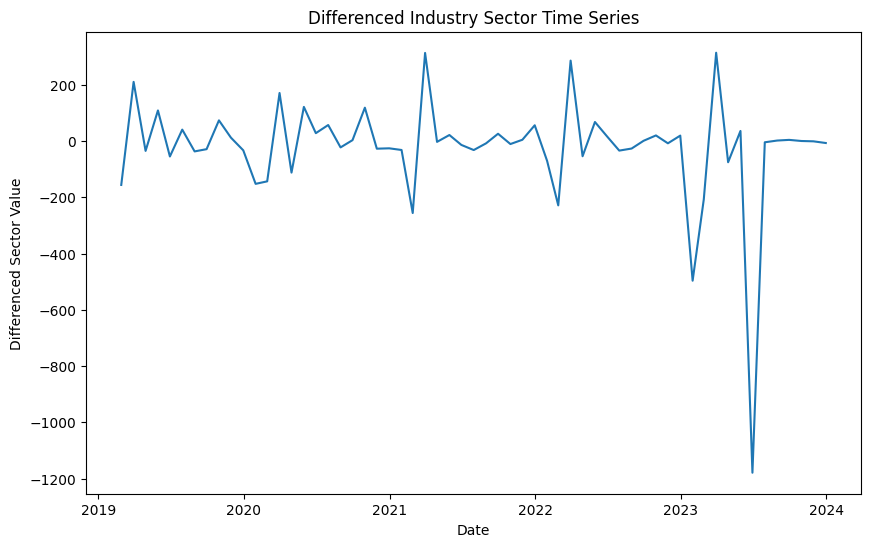

Industry: Differenced series is non-stationary.


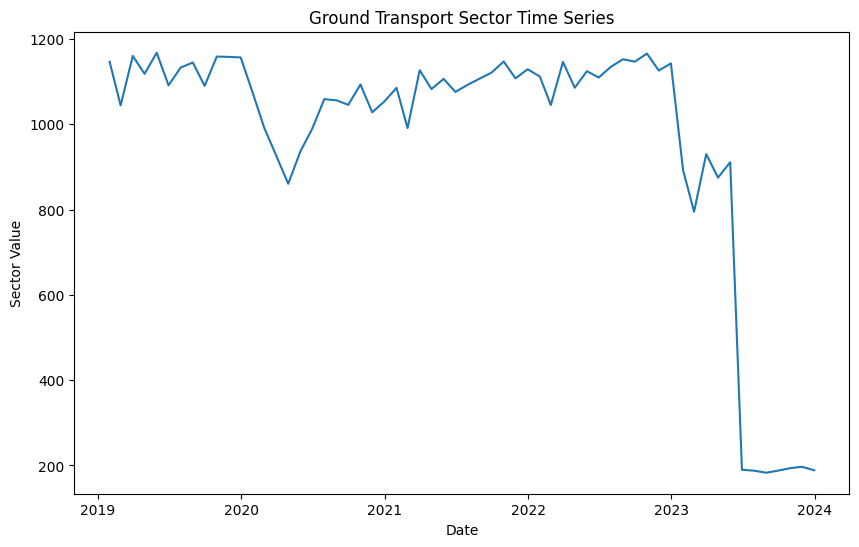

Ground Transport: Fail to reject the null hypothesis. The time series is non-stationary.


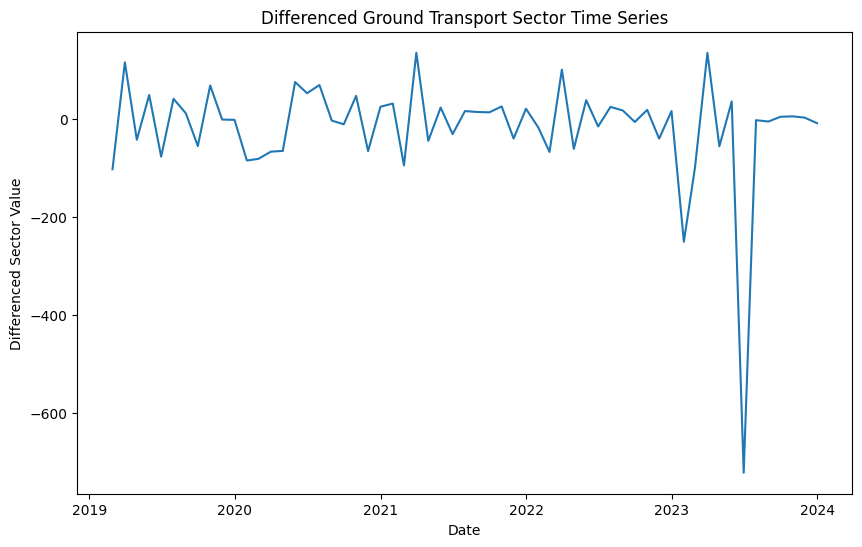

Ground Transport: Differenced series is stationary.


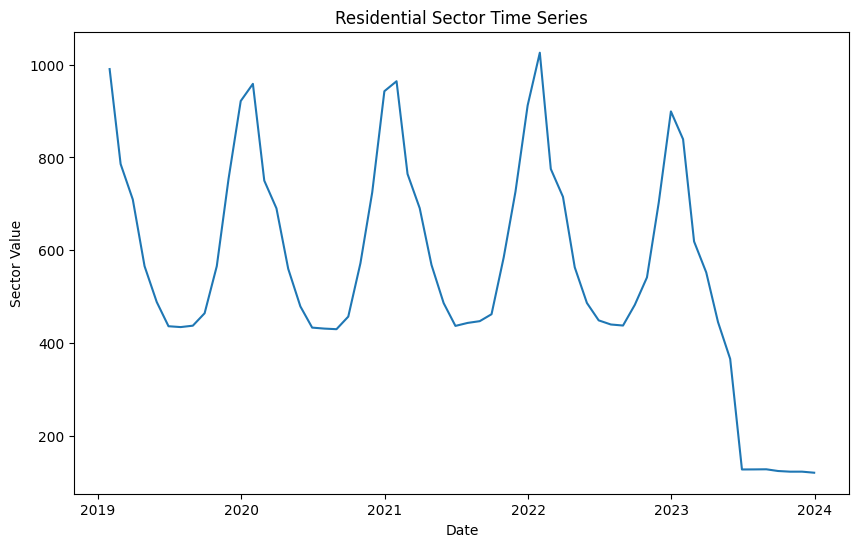

Residential: Fail to reject the null hypothesis. The time series is non-stationary.


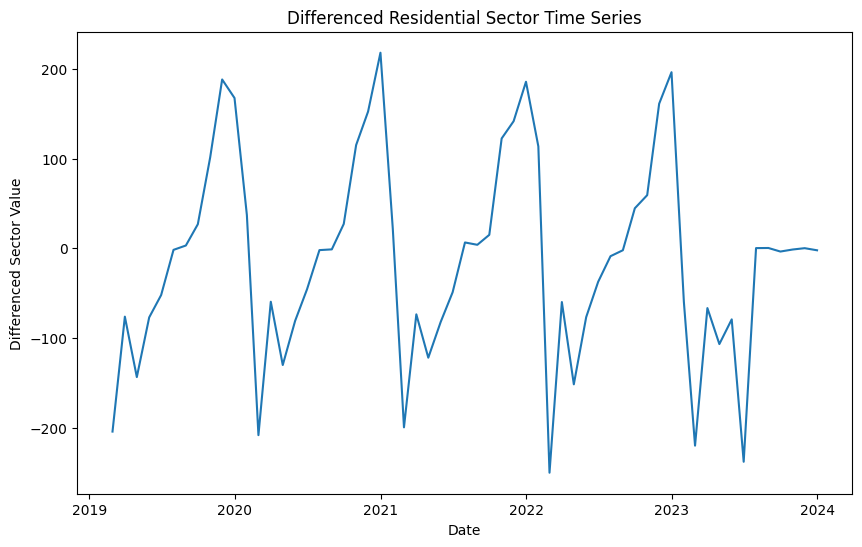

Residential: Differenced series is non-stationary.


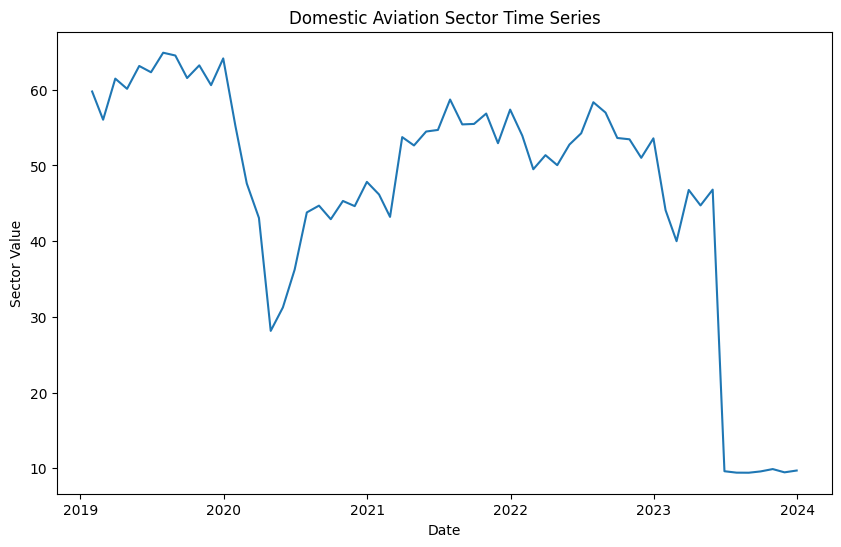

Domestic Aviation: Fail to reject the null hypothesis. The time series is non-stationary.


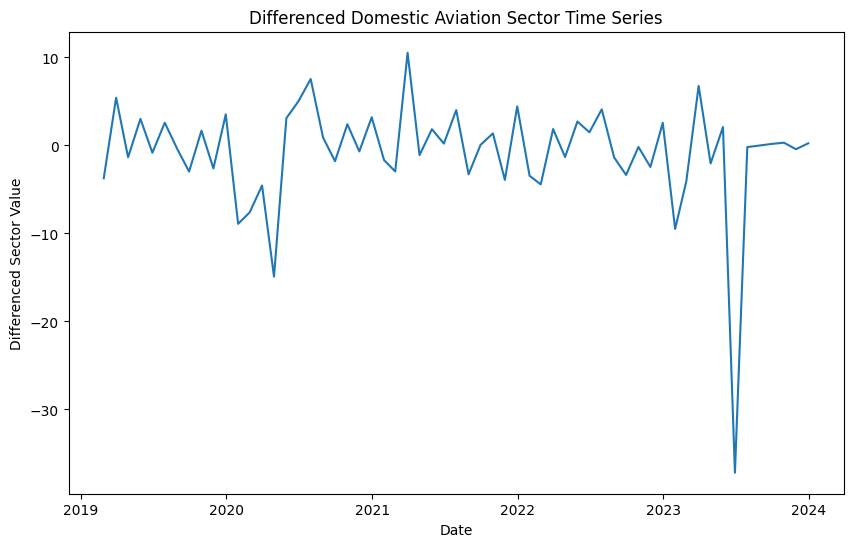

Domestic Aviation: Differenced series is stationary.


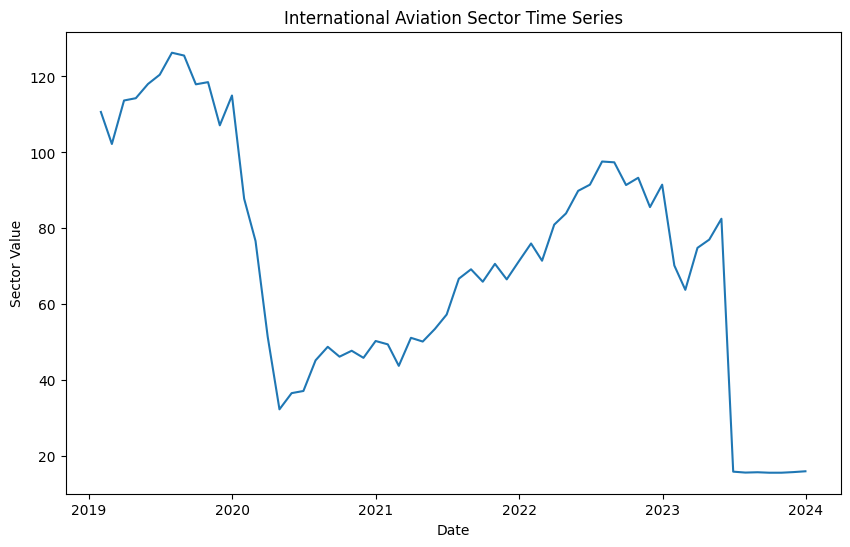

International Aviation: Fail to reject the null hypothesis. The time series is non-stationary.


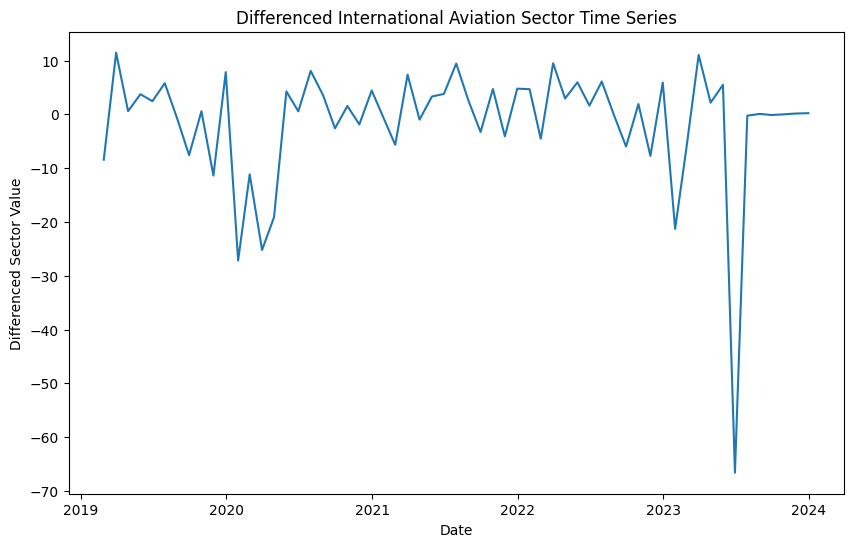

International Aviation: Differenced series is stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Get the list of unique sectors
unique_sectors = df['sector'].unique()

# Specify the frequency for resampling
frequency = 'M'  # Adjust based on your data frequency

# Loop through each sector and perform the analysis
for sector_to_analyze in unique_sectors:
    sector_data = df[df['sector'] == sector_to_analyze]['value']

    # Resample the data to the specified frequency
    resampled_sector_data = sector_data.resample(frequency).sum()

    # Plot the original time series
    plt.figure(figsize=(10, 6))
    plt.plot(resampled_sector_data)
    plt.xlabel('Date')
    plt.ylabel('Sector Value')
    plt.title(f'{sector_to_analyze} Sector Time Series')
    plt.show()

    # Perform ADF test on the original data
    adf_test_result = adfuller(resampled_sector_data)
    p_value = adf_test_result[1]

    if p_value <= 0.05:
        print(f"{sector_to_analyze}: Reject the null hypothesis. The time series is stationary.")
    else:
        print(f"{sector_to_analyze}: Fail to reject the null hypothesis. The time series is non-stationary.")

    # Perform differencing
    differenced_data = resampled_sector_data.diff().dropna()

    # Plot the differenced time series
    plt.figure(figsize=(10, 6))
    plt.plot(differenced_data)
    plt.xlabel('Date')
    plt.ylabel('Differenced Sector Value')
    plt.title(f'Differenced {sector_to_analyze} Sector Time Series')
    plt.show()

    # Perform ADF test on the differenced data
    adf_test_result_diff = adfuller(differenced_data)
    p_value_diff = adf_test_result_diff[1]

    if p_value_diff <= 0.05:
        print(f"{sector_to_analyze}: Differenced series is stationary.")
    else:
        print(f"{sector_to_analyze}: Differenced series is non-stationary.")


Autocorrelation and Partial Autocorrelation:

Analyze autocorrelation and partial autocorrelation plots to determine AR and MA terms for modeling.
Build Time Series Model:

Build an appropriate model for your time series data, such as ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA).
Model Evaluation and Forecasting:

Evaluate your model using metrics like AIC or BIC and perform forecasting to predict future values.
Visualize Results:

Plot the observed values, predicted values, and confidence intervals for the forecasted period.

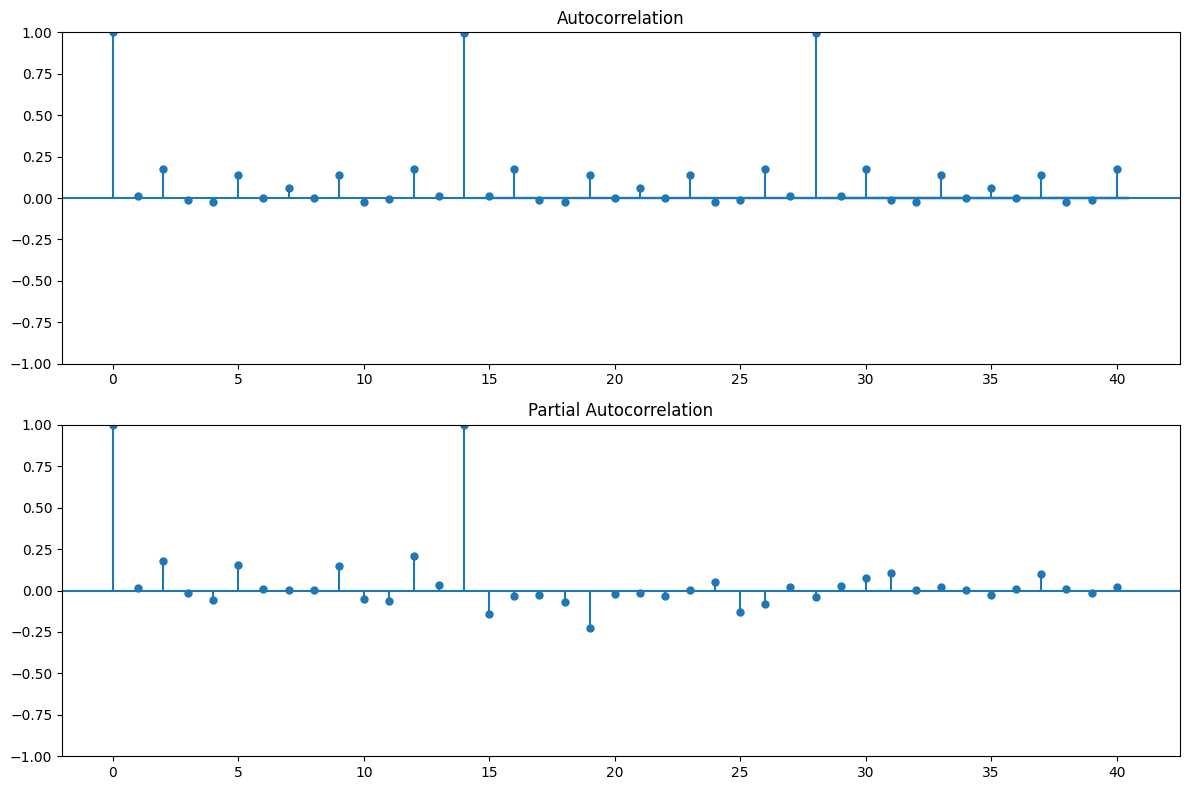

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['value'], ax=ax1, lags=40)
plot_pacf(df['value'], ax=ax2, lags=40)
plt.tight_layout()
plt.show()

In [ ]:
pip install statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


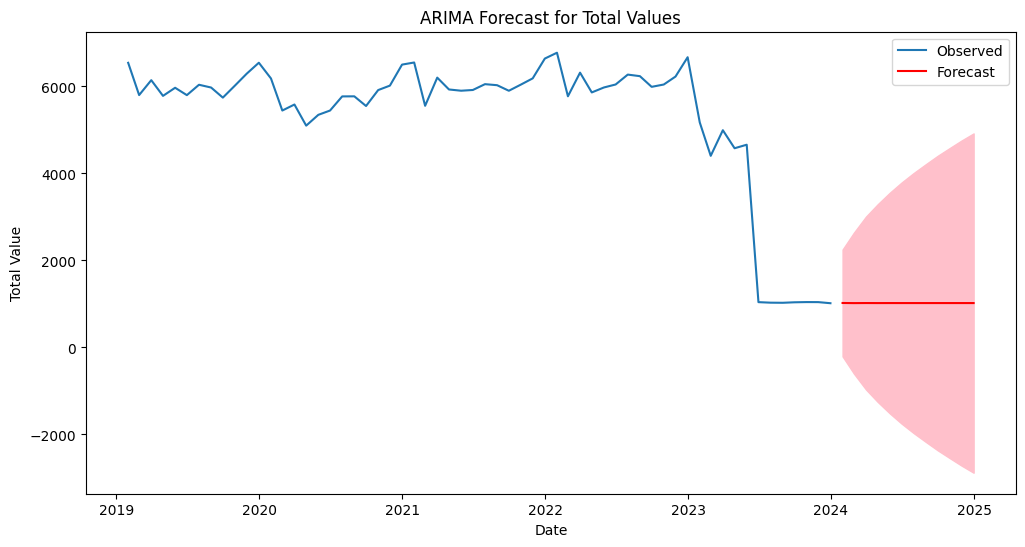

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess data (similar to previous steps)
# ...

# Aggregate total values across all sectors
total_values = df.groupby('date')['value'].sum()

# Resample the total values
frequency = 'M'
resampled_total_values = total_values.resample(frequency).sum()
resampled_total_values.dropna(inplace=True)

# Specify the chosen ARIMA orders (p, d, q)
p = 2  # Example value based on ACF
d = 1  # Example value based on differencing
q = 1  # Example value based on PACF

# Fit the ARIMA model
model = ARIMA(resampled_total_values, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_horizon = 12  # Number of periods ahead to forecast
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Get forecasted values, confidence intervals, and index
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_index = pd.date_range(start=resampled_total_values.index[-1], periods=forecast_horizon+1, freq='M')[1:]

# Plot the observed, forecasted, and confidence interval values
plt.figure(figsize=(12, 6))
plt.plot(resampled_total_values, label='Observed')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('ARIMA Forecast for Total Values')
plt.legend()
plt.show()


SARIMA (Seasonal ARIMA). Model Evaluation and Forecasting:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


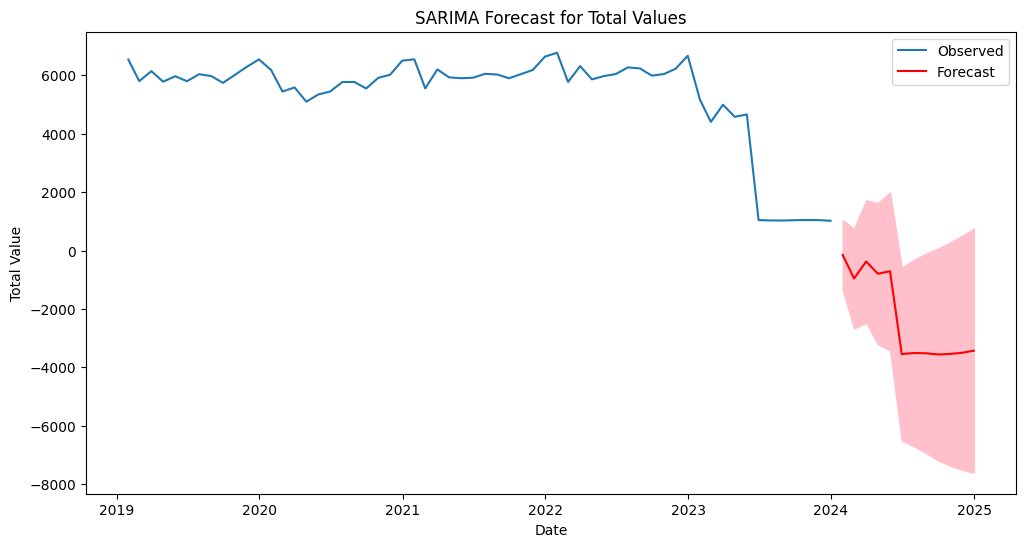

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Aggregate total values across all sectors
total_values = df.groupby('date')['value'].sum()

# Resample the total values
frequency = 'M'
resampled_total_values = total_values.resample(frequency).sum()
resampled_total_values.dropna(inplace=True)

# Specify the non-seasonal and seasonal orders (p, d, q) and (P, D, Q, S)
p = 2  # Example value based on ACF
d = 1  # Example value based on differencing
q = 1  # Example value based on PACF
P = 1  # Example value based on seasonal ACF
D = 1  # Example value based on seasonal differencing
Q = 1  # Example value based on seasonal PACF
S = 12  # Seasonal period (12 for monthly data)

# Fit the SARIMA model
model = SARIMAX(resampled_total_values, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Forecast future values
forecast_horizon = 12  # Number of periods ahead to forecast
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Get forecasted values, confidence intervals, and index
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_index = pd.date_range(start=resampled_total_values.index[-1], periods=forecast_horizon+1, freq='M')[1:]

# Plot the observed, forecasted, and confidence interval values
plt.figure(figsize=(12, 6))
plt.plot(resampled_total_values, label='Observed')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('SARIMA Forecast for Total Values')
plt.legend()
plt.show()


**Value Trends**: Study how sector values change over different dates and time periods.

<ipython-input-106-bb3e66c2bcfe>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-106-bb3e66c2bcfe>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.groupby('sector').resample('M').sum()
<ipython-input-106-bb3e66c2bcfe>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.groupby('sector').resample('M').sum()
<ipython-input-106-bb3e66c2bcfe>:12: FutureWarning: The default value of n

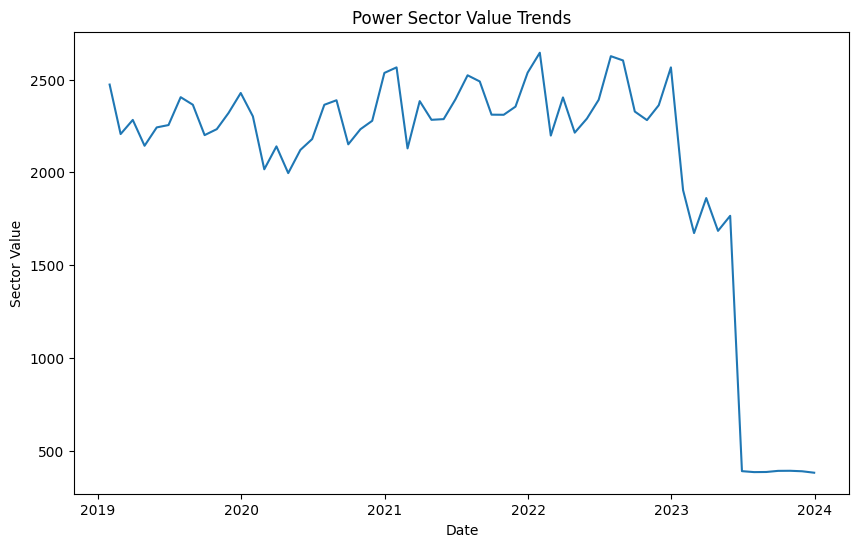

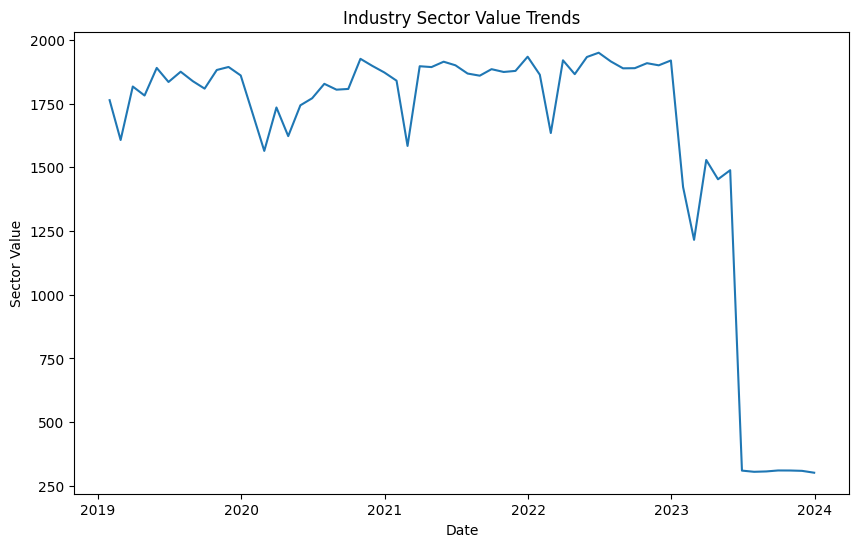

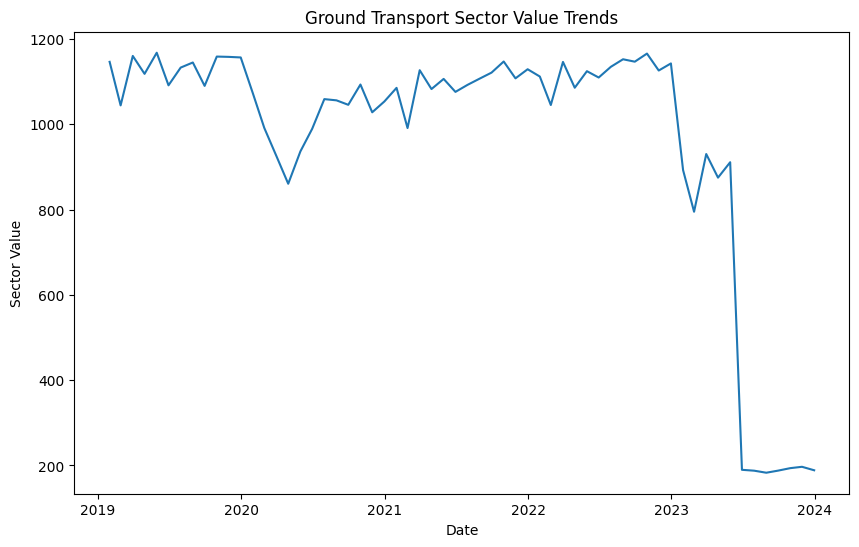

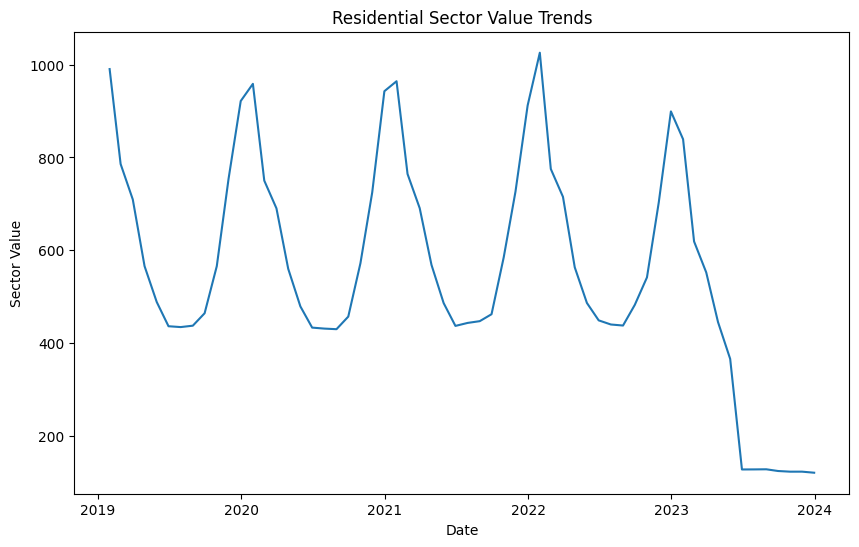

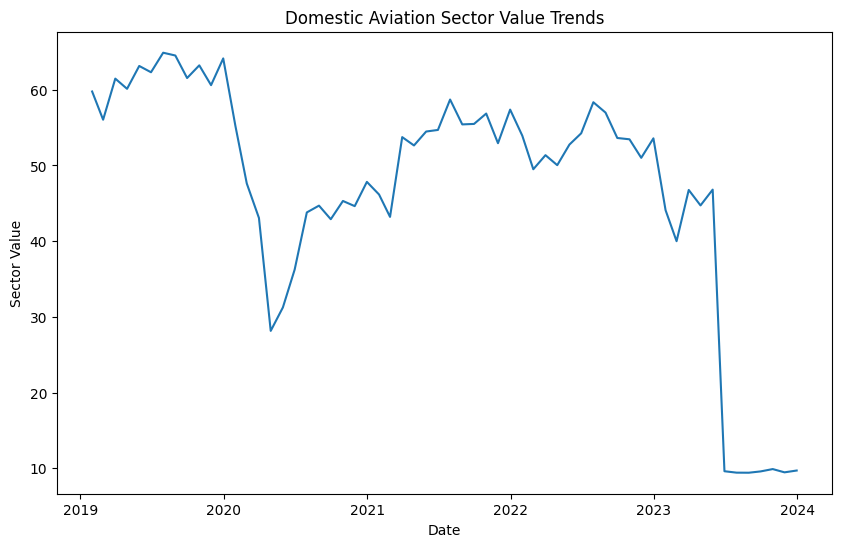

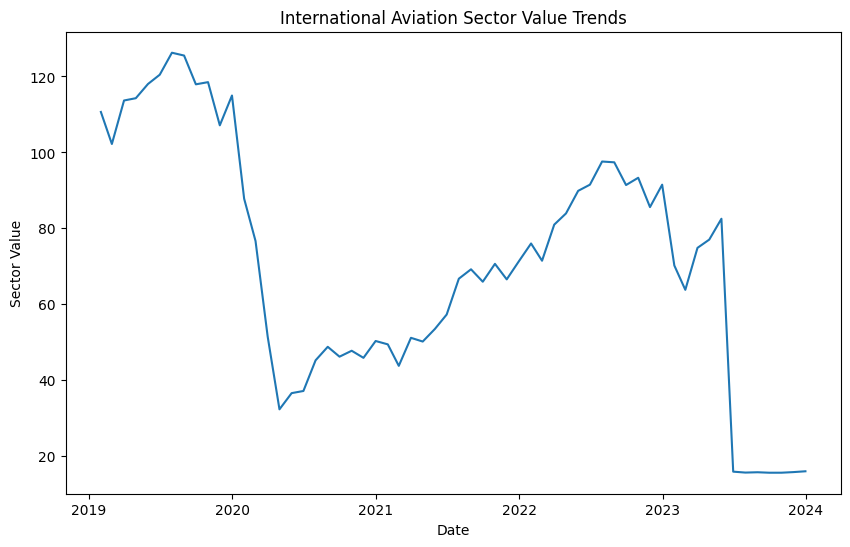

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Group by sector and resample to monthly frequency
df_monthly = df.groupby('sector').resample('M').sum()

# Plot value trends for each sector
sectors = df['sector'].unique()
for sector in sectors:
    sector_data = df_monthly.loc[sector, 'value']
    plt.figure(figsize=(10, 6))
    plt.plot(sector_data)
    plt.xlabel('Date')
    plt.ylabel('Sector Value')
    plt.title(f'{sector} Sector Value Trends')
    plt.show()



**Sector Performance**: Analyze the performance of different sectors within specific countries.

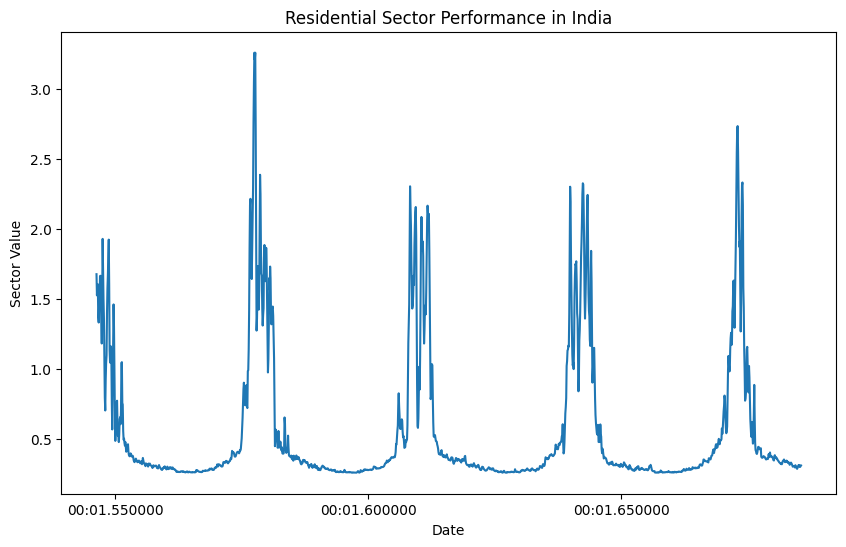

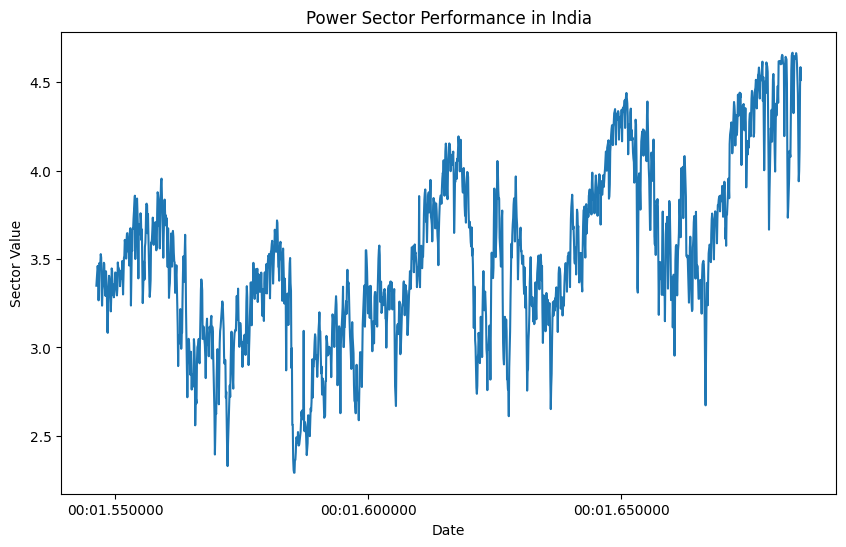

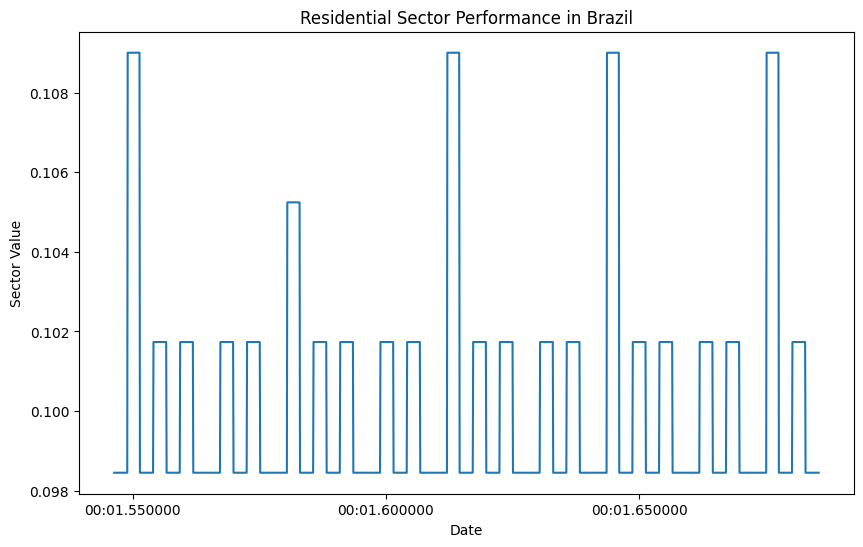

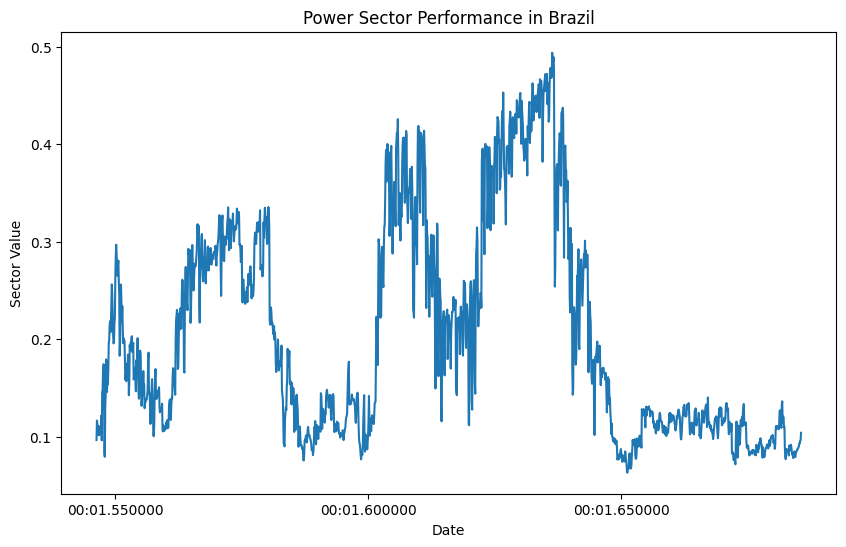

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'timestamp' column to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# List of countries and sectors to analyze
countries_to_analyze = ['India', 'Brazil']  # Add the desired countries
sectors_to_analyze = ['Residential', 'Power']  # Add the desired sectors

# Loop through each country and sector to create line plots
for country in countries_to_analyze:
    for sector in sectors_to_analyze:
        sector_data = df[(df['country'] == country) & (df['sector'] == sector)]['value']
        plt.figure(figsize=(10, 6))
        plt.plot(sector_data)
        plt.xlabel('Date')
        plt.ylabel('Sector Value')
        plt.title(f'{sector} Sector Performance in {country}')
        plt.show()


**Comparative Analysis**: Compare sector values between countries or sectors.

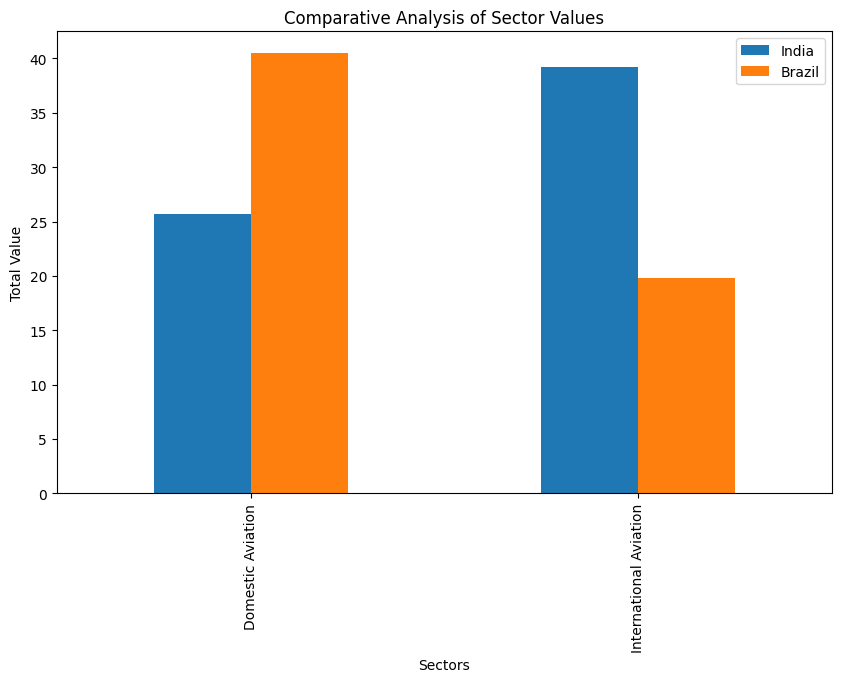

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Choose the countries and sectors for comparison
countries_to_compare = ['India', 'Brazil']  # Add the countries you want to compare
sectors_to_compare = ['Domestic Aviation', 'International Aviation']      # Add the sectors you want to compare

# Create a dictionary to store sector values for each country
sector_values_by_country = {}

# Loop through each country and sector to extract sector values
for country in countries_to_compare:
    sector_values_by_country[country] = {}
    for sector in sectors_to_compare:
        sector_values = df[(df['country'] == country) & (df['sector'] == sector)]['value']
        sector_values_by_country[country][sector] = sector_values.sum()

# Convert the dictionary to a DataFrame for easy plotting
comparison_df = pd.DataFrame(sector_values_by_country)

# Plot the comparison using a bar plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sectors')
plt.ylabel('Total Value')
plt.title('Comparative Analysis of Sector Values')
plt.show()


 **Impact of Events**: Study how external events or factors influence sector values.

<ipython-input-113-20b33442292e>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


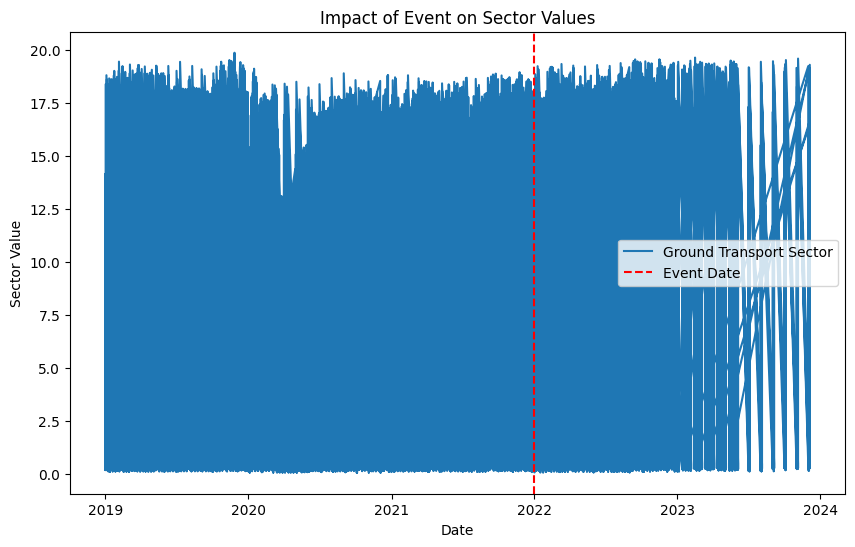

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Choose the sector and event date
sector_to_analyze = 'Ground Transport'  # Choose the sector you want to analyze
event_date = pd.to_datetime('2022-01-01')  # Specify the event date

# Filter data for the chosen sector
sector_data = df[df['sector'] == sector_to_analyze]['value']

# Plot sector values against the timeline
plt.figure(figsize=(10, 6))
plt.plot(sector_data, label=f'{sector_to_analyze} Sector')
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')
plt.xlabel('Date')
plt.ylabel('Sector Value')
plt.title('Impact of Event on Sector Values')
plt.legend()
plt.show()


The code will create a line plot that shows the sector values over time and marks the event date with a vertical dashed line. This allows you to visually analyze how the event impacted the sector values. You can adapt this code to analyze multiple sectors and events as needed.

**Predictive Models**: Build models to predict future sector values based on historical data.

<ipython-input-120-94c0f452027b>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


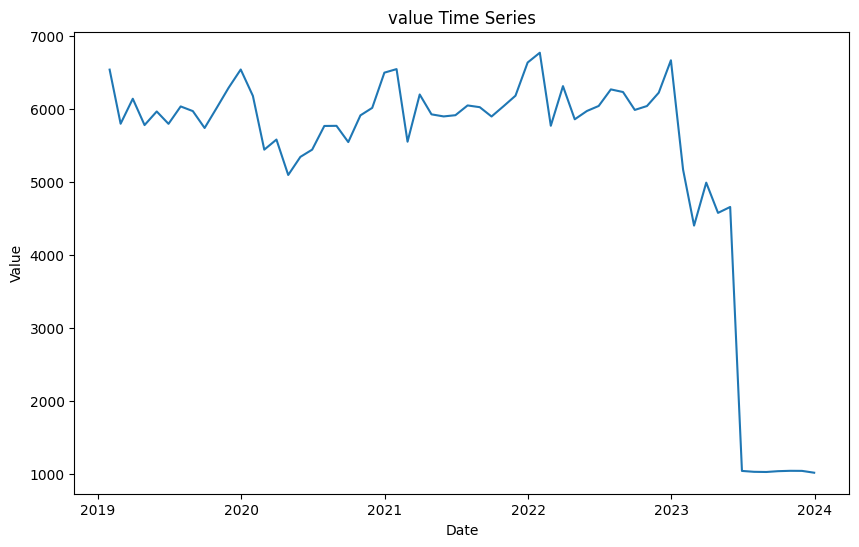

<Figure size 1200x600 with 0 Axes>

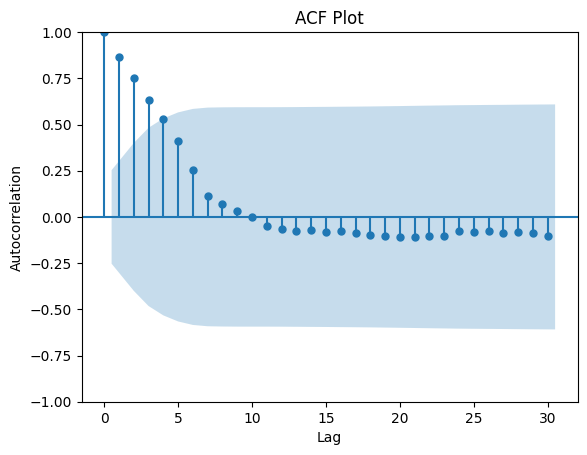

<Figure size 1200x600 with 0 Axes>

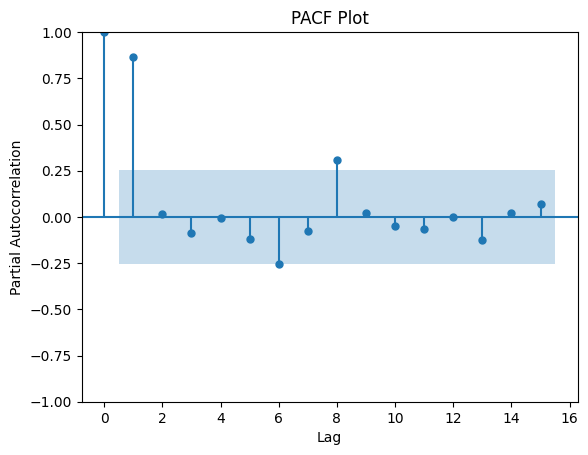

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


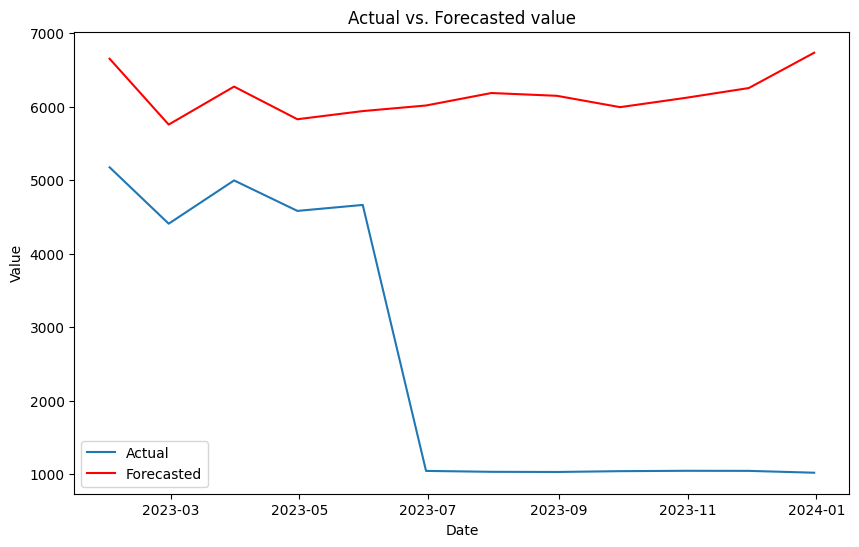

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Choose the value for analysis
value_to_analyze = 'value'  # Replace with the actual column name
value_data = df[value_to_analyze]

# Resample the data to a specific frequency (e.g., 'D' for daily, 'M' for monthly)
frequency = 'M'  # Adjust based on your data frequency
resampled_value_data = value_data.resample(frequency).sum()

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(resampled_value_data)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{value_to_analyze} Time Series')
plt.show()

# Plot ACF and PACF plots to determine model orders
plt.figure(figsize=(12, 6))
plot_acf(resampled_value_data, lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(resampled_value_data, lags=15, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()

# Train-test split
train_size = int(len(resampled_value_data) * 0.8)
train_data = resampled_value_data[:train_size]
test_data = resampled_value_data[train_size:]

# Fit SARIMA model
order = (2, 1, 2)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Actual vs. Forecasted {value_to_analyze}')
plt.legend()
plt.show()



his code will help you fit a SARIMA model, perform forecasting, and visualize the results. Keep in mind that model parameters (order and seasonal_order) need to be chosen based on the ACF and PACF plots, and you may need to adjust them for your specific dataset.

 **Correlation Analysis**: Explore correlations between sector values and other variables.

<ipython-input-122-57aaab33d113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


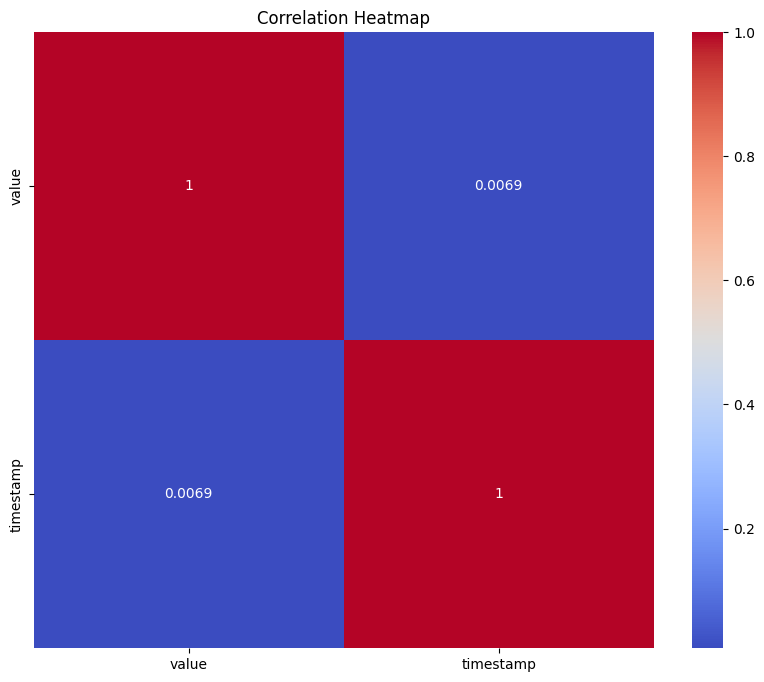

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Anomaly Detection: Identify unusual spikes or drops in sector values and investigate their causes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Calculate the z-score for each sector's values
df['z_score'] = (df['value'] - df.groupby(['sector', pd.Grouper(freq='Y')])['value'].transform('mean')) / df.groupby(['sector', pd.Grouper(freq='Y')])['value'].transform('std')

# Set the z-score threshold for anomaly detection
z_score_threshold = 2.0

# Find anomalies based on the z-score threshold
anomalies = df[abs(df['z_score']) > z_score_threshold]

# Create an interactive anomaly plot using Plotly
fig = px.line(df, x=df.index, y='value', labels={'value': 'Sector Value'},
              title='Sector Value Anomaly Detection (Yearly Basis)')
fig.add_scatter(x=anomalies.index, y=anomalies['value'], mode='markers', name='Anomalies', marker=dict(color='red'))
fig.show()

# Display the anomalies
print(anomalies)



           country                  sector     value   timestamp   z_score
date                                                                      
2019-01-01   WORLD                   Power  36.83320  1546300800  3.281822
2019-01-02   WORLD                   Power  39.11250  1546387200  3.519728
2019-01-03   WORLD                   Power  39.78680  1546473600  3.590110
2019-01-04   WORLD                   Power  40.42570  1546560000  3.656796
2019-01-05   WORLD                   Power  39.17760  1546646400  3.526523
...            ...                     ...       ...         ...       ...
2023-05-27   WORLD  International Aviation   1.65229  1685145600  3.695633
2023-05-28   WORLD  International Aviation   1.62929  1685232000  3.636015
2023-05-29   WORLD  International Aviation   1.58654  1685318400  3.525202
2023-05-30   WORLD  International Aviation   1.55845  1685404800  3.452390
2023-05-31   WORLD  International Aviation   1.55845  1685491200  3.452390

[8842 rows x 5 columns]


<ipython-input-150-beae7f08bb65>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



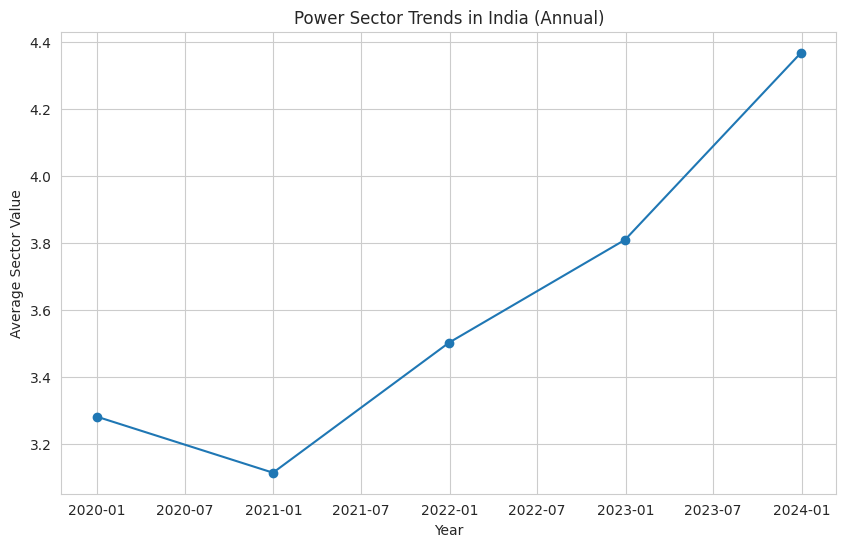

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)
country_to_analyze = 'India'
sector_to_analyze = 'Power'
filtered_data = df[(df['country'] == country_to_analyze) & (df['sector'] == sector_to_analyze)]
resampled_data = filtered_data.resample('Y').mean()
plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, resampled_data['value'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sector Value')
plt.title(f'{sector_to_analyze} Sector Trends in {country_to_analyze} (Annual)')
plt.grid(True)
plt.show()



**Month-to-Month Comparison**: Study how sector values change from one month to another.

<ipython-input-149-99a61ae5898f>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



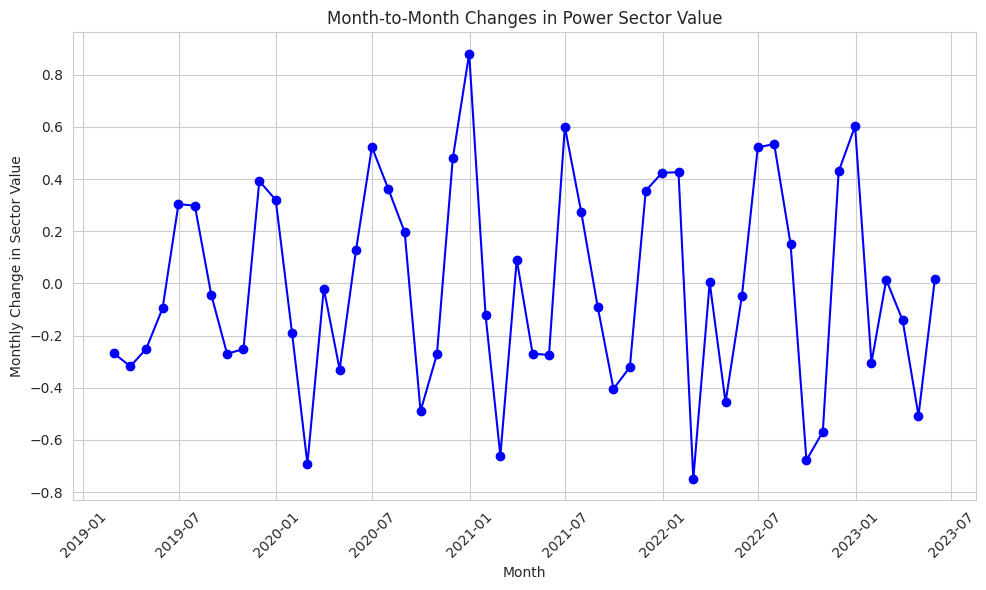

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)
sector_to_analyze = 'Power'
filtered_data = df[df['sector'] == sector_to_analyze]
resampled_data = filtered_data.resample('M').mean()
resampled_data['monthly_change'] = resampled_data['value'].diff()
plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, resampled_data['monthly_change'], marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Monthly Change in Sector Value')
plt.title(f'Month-to-Month Changes in {sector_to_analyze} Sector Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Time of Day Analysis**: Study differences in sector values at different times of the day.

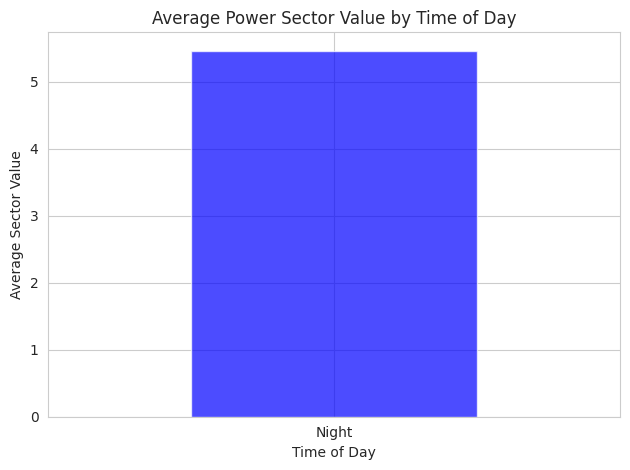

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['time_of_day'] = df['date'].dt.hour
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_category'] = df['time_of_day'].apply(categorize_time)
sector_to_analyze = 'Power'
filtered_data = df[df['sector'] == sector_to_analyze]
time_of_day_analysis = filtered_data.groupby('time_category')['value'].mean()
time_of_day_analysis.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Time of Day')
plt.ylabel('Average Sector Value')
plt.title(f'Average {sector_to_analyze} Sector Value by Time of Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
